In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
train_X=pd.read_csv("Logistic regression data set/train_X.csv")
train_Y=pd.read_csv("Logistic regression data set/train_Y.csv")
X0=np.random.randint(1,2,train_X.shape[0])
train_X["X0"]=X0
train_X.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,X0
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,0,1
2,2,3,1,26.0,0,0,7.9250,1,1
3,3,1,1,35.0,1,0,53.1000,1,1
4,4,3,0,35.0,0,0,8.0500,1,1


In [2]:
train_Y.head()

,Id,Survived
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0


In [3]:
train_X=train_X.drop("Id",axis=1)
train_Y=train_Y.drop("Id",axis=1)
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,X0
0,3,0,22.0,1,0,7.2500,1,1
1,1,1,38.0,1,0,71.2833,0,1
2,3,1,26.0,0,0,7.9250,1,1
3,1,1,35.0,1,0,53.1000,1,1
4,3,0,35.0,0,0,8.0500,1,1


In [4]:
train_Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [5]:
train_X=train_X.values
train_Y=train_Y.values      # .values to change dataframe into aray
train_X=train_X.T
train_X.shape

(8, 891)

In [6]:
train_Y=train_Y.T
train_Y.shape

(1, 891)

In [7]:
print(train_X.shape)
print(train_Y.shape)


(8, 891)
(1, 891)


In [59]:
n=train_X.shape[0]
m=train_X.shape[1]
alpha=0.00099
theta=np.zeros((n,1))
itrar=[]
costar=[]
for i in range(100000):
    def sigmoid(Z):
            return 1/(1+np.exp(-Z))
    Z=np.dot(theta.T,train_X)
    hypo=sigmoid(Z)
    deltheta=(1/m)*np.dot((hypo-train_Y),train_X.T)
    theta=theta-alpha*(deltheta.T)
    cost=-(1/m)*np.sum(train_Y*np.log(hypo)+(1-train_Y)*np.log(1-hypo))
    itrar.append(cost)
    costar.append(i)

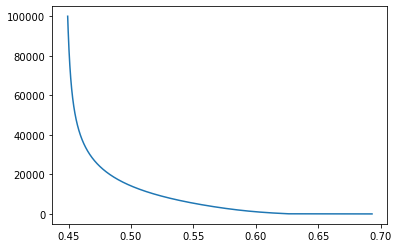

In [60]:
plt.plot(itrar,costar)

In [34]:
test_X=pd.read_csv("Logistic regression data set/test_X.csv")
test_Y=pd.read_csv("Logistic regression data set/test_Y.csv")
X0=np.random.randint(1,2,test_X.shape[0])
test_X["X0"]=X0
test_X=test_X.drop("Id",axis=1)
test_Y=test_Y.drop("Id",axis=1)
test_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,X0
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,1,1
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,1,1
4,3,1,22.0,1,1,12.2875,1,1


In [35]:
test_X=test_X.values
test_Y=test_Y.values      # .values to change dataframe into aray
test_X=test_X.T
test_Y=test_Y.T
print(test_X.shape)
print(test_Y.shape)


(8, 418)
(1, 418)


In [36]:
def accuracy(X,Y,theta):
    z=np.dot(theta.T,X)
    A=sigmoid(z)
    A=A>0.5   
    A=np.array(A,dtype="int64")
    acc=(1-(np.sum(np.absolute(A-Y))/Y.shape[1]))*100
    print(acc)

In [61]:
accuracy(test_X,test_Y,theta)

92.10526315789474
